In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv("./playground-series-s4e10/train.csv")
test_data = pd.read_csv("./playground-series-s4e10/test.csv")

In [3]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
train_data.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
train_data.shape

(58645, 13)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

Making categorical Columns into numericals

In [7]:
def preprocess_data(df):
    le = LabelEncoder()
    categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])
    return df

In [8]:
train_data_transformed = preprocess_data(train_data)
test_data_transformed = preprocess_data(test_data) 

In [9]:
X_train = train_data_transformed.drop(['id', 'loan_status'], axis=1)
Y_train = train_data_transformed['loan_status']

In [10]:
X_Test = test_data_transformed.drop(['id'], axis=1)

In [11]:
X_Test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,0,2.0,0,1,3000,10.37,0.10,0,4
39094,22,48000,0,6.0,1,0,7000,6.03,0.15,0,3
39095,51,60000,0,0.0,4,0,15000,7.51,0.25,0,25
39096,22,36000,0,4.0,4,3,14000,15.62,0.39,1,4


In [12]:
X_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10
58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8
58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2
58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3


In [20]:
!conda install -c conda-forge xgboost -y

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/conda/base/context.py:969: FutureWarning: Adding 'defaults' to channel list implicitly. is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/conda/base/context.py:969: FutureWarning: Adding 'defaults' to channel list implicitly. is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniconda/base

  added / updated specs:
    - xgboost


The following packages will be downloaded:



In [24]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [25]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

In [26]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [27]:
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    verbose=2, 
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] 

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:46] 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsampl

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:48] 

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] 

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.9

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] 

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] 

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] 

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7;

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.7; total

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:50] 

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] 

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] 

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] 

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   1.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:53] 

[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.9; total time=   1.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] 

[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:55] 

[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.9; total time=   1.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:56] 

[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] 

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] 

[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] 

[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:39:59] 

[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:00] 

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:01] 

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] 

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] 

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] 

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:07] 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] 

[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.6s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.6s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:08] 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsa

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] 

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=500, subsample=0.6; to

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:11] 

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, subsampl

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] 

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] 

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] 

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] 

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   1.6s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:17] 

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:18] 

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] 

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] 

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:20] 

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] 

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] 

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:22] 

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] 

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:24] 

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] 

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.3s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] 

[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.6s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] 

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; t

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] 

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.8; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] 

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.8; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.6; total time=   0.6s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:27] 

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.9s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:28] 

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] 

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   1.0s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:29] 

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.6s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] 

[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] 

[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.7s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; to

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.2s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727634913186/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, verbose=2)

In [29]:
best_model = random_search.best_estimator_

In [30]:
y_pred = best_model.predict(X_Test)

In [31]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}


In [32]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'loan_status': y_pred
})

In [33]:
submission.to_csv('xgboost_submission.csv', index=False)
print("Submission file created: xgboost_submission.csv")

Submission file created: xgboost_submission.csv



Top 10 Most Important Features:
                     feature  importance
5                 loan_grade    0.339132
2      person_home_ownership    0.182604
8        loan_percent_income    0.145967
7              loan_int_rate    0.068670
4                loan_intent    0.063309
1              person_income    0.057543
9  cb_person_default_on_file    0.053830
6                  loan_amnt    0.033899
3          person_emp_length    0.027675
0                 person_age    0.015942


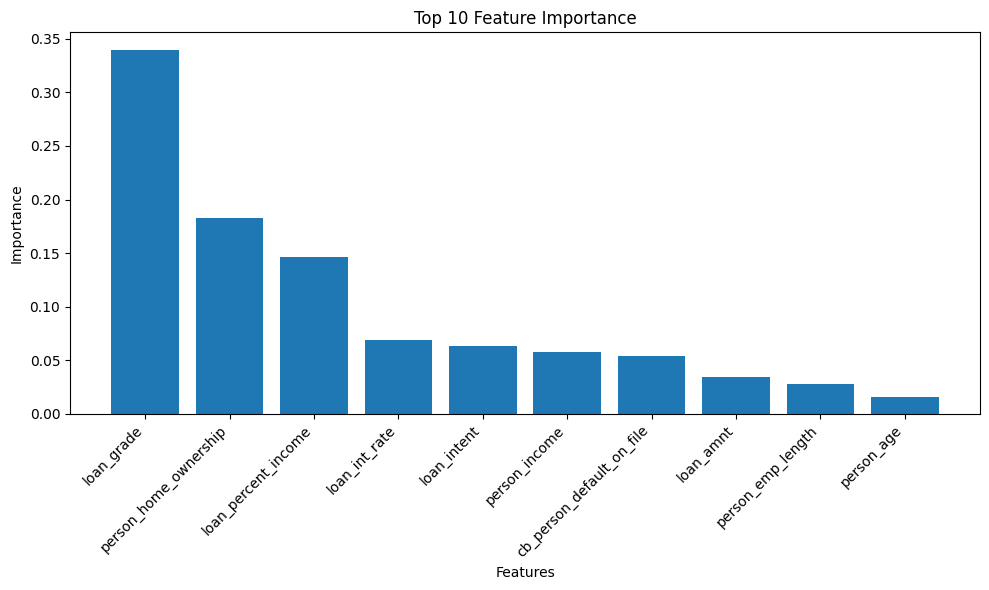

In [34]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Optionally, plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()